In [290]:
import numpy as np
import sys, os, pdb, importlib
from matplotlib import rc
from matplotlib import rcParams

## Plotting
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from scipy.ndimage.interpolation import rotate

## Project-specific notebook
sys.path.append('../src/')
import ast2050.lab4 as l4

rc('text', usetex=True)
rc('font', family='DejaVu Sans')
rc('font', serif='cm')
rc('font', size=16)

In [13]:
data1 = l4.read_tiff('./data/April17/Neon1.tiff')[500:550,0:800]

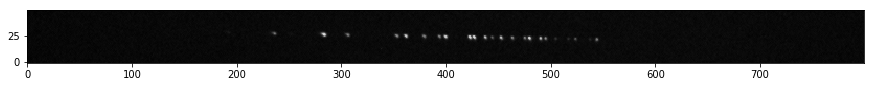

In [15]:
fig = plt.figure( figsize=(15,15) )
plt.imshow(data1, vmin=0, vmax=255, origin='lower')
plt.show()

In [17]:
data_summed = np.zeros((800, 3))
for i in range(np.shape(data1)[1]):
    temp = np.sum(data1[:,i])
    data_summed[i] = temp

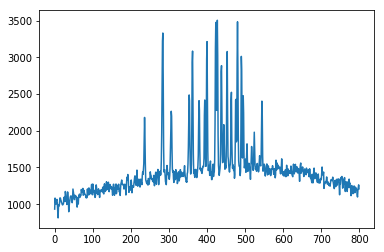

In [23]:
plt.plot(data_summed[:,2])

In [28]:
def envelope(wav, depth, numbins):
	bins = np.linspace(min(wav), max(wav), numbins)
	digitized = np.digitize(wav, bins)
	bin_mins = [depth[digitized==i].min() for i in range(1, len(bins))]
	idxs = [np.where(depth==mi)[0][0] for mi in bin_mins]
	wavs = [wav[i] for i in idxs]
	F = interp1d(wavs, bin_mins, fill_value='extrapolate')
	return depth - F(wav)

In [125]:
test = envelope(np.arange(800), data_summed[:,0], 10)
peaks, _ = find_peaks(test, height=275)

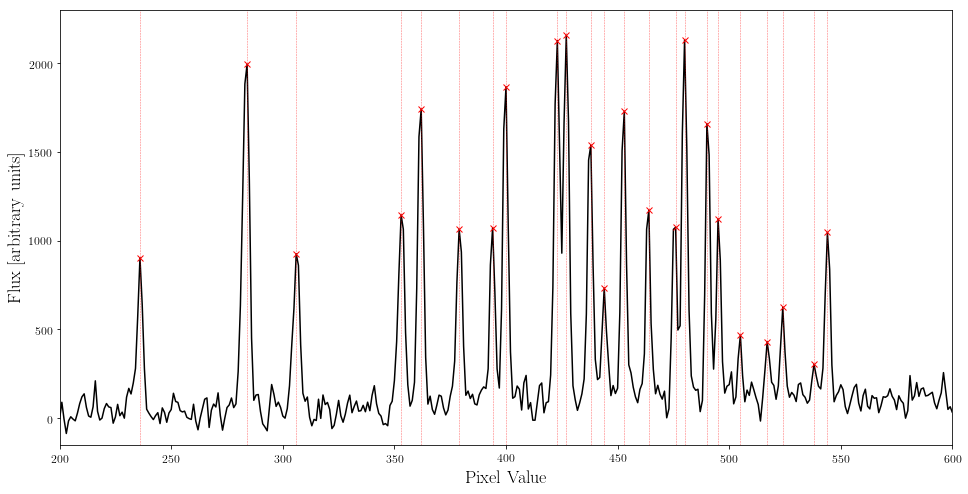

In [126]:
fig = plt.figure(figsize=(16, 8))
plt.plot(test, color='k')
plt.plot(peaks, test[peaks], "x", color='red')
for peak in peaks:
    plt.axvline(peak, linestyle='--', color='red', linewidth=0.5, alpha=0.6)
plt.xlim(200, 600)
plt.xlabel('Pixel Value', fontsize=18)
plt.ylabel('Flux [arbitrary units]', fontsize=18)
plt.ylim(-150, 2300)
plt.show()

In [127]:
neon_vals = np.asarray([7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6532.88, 6506.53, 6402.25, 6382.99, 6334.43, 6304.79, 6266.49, 6217.28, 6163.59, 6143.06, 6096.16, 6074.34, 6030.00, 5975.53, 5944.83, 5881.89, 5852.49])

In [79]:
cal = interp1d(peaks[1:], neon_vals, fill_value='extrapolate')

In [80]:
sol = cal(np.arange(200, 600))

Text(0,0.5,'Wavelength Value [Angstroms]')

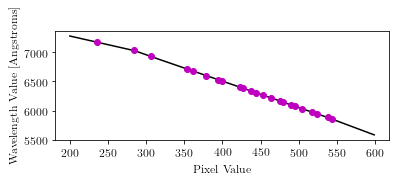

In [85]:
fig = plt.figure(figsize=(6, 2))
plt.plot(np.arange(200, 600), sol, 'k')
plt.plot(peaks[1:], neon_vals, 'o', color='m')
plt.xlabel('Pixel Value')
plt.ylabel('Wavelength Value [Angstroms]')

In [95]:
data2 = l4.read_tiff('./data/18April/Hydrogen1.tiff')[500:550]

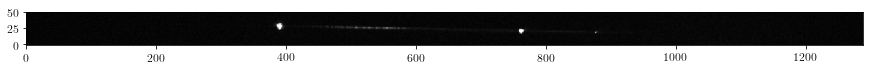

In [96]:
fig = plt.figure( figsize=(15,15) )
plt.imshow(data2, vmin=0, vmax=255, origin='lower')
plt.show()

In [99]:
data2_summed = np.zeros((1288, 3))
for i in range(np.shape(data2)[1]):
    temp = np.sum(data2[:,i])
    data2_summed[i] = temp

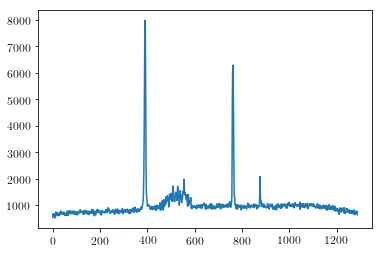

In [128]:
plt.plot(data2_summed[:,2])

In [129]:
test2 = envelope(np.arange(1288), data2_summed[:,0], 40)
peaks2, _ = find_peaks(test2, height=1200)

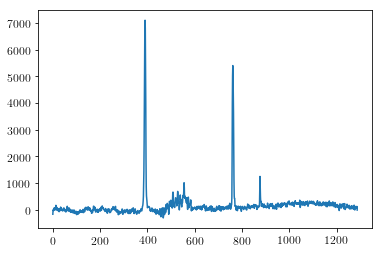

In [130]:
plt.plot(test2)

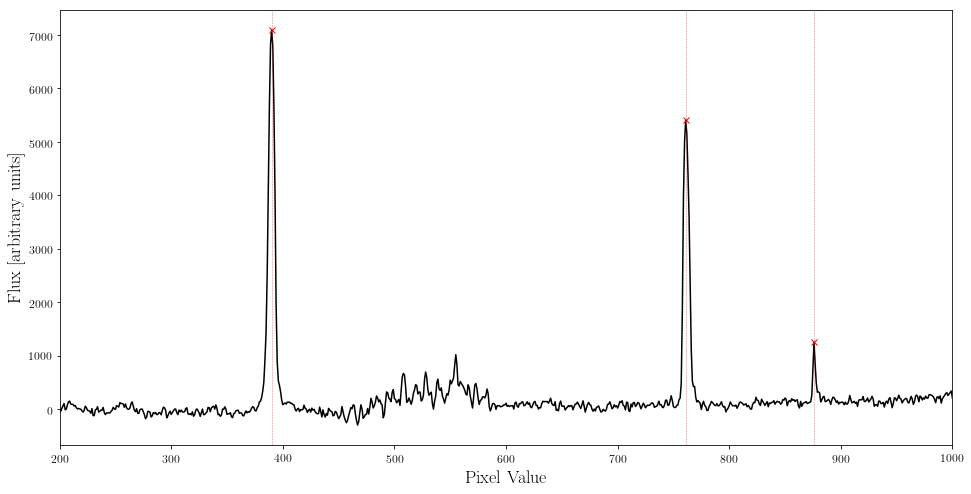

In [132]:
fig = plt.figure(figsize=(16, 8))
plt.plot(test2, color='k')
plt.plot(peaks2, test2[peaks2], "x", color='red')
for peak2 in peaks2:
    plt.axvline(peak2, linestyle='--', color='red', linewidth=0.5, alpha=0.6)
plt.xlim(200, 1000)
plt.xlabel('Pixel Value', fontsize=18)
plt.ylabel('Flux [arbitrary units]', fontsize=18)
#plt.ylim(-150, 2300)
plt.show()

In [140]:
h_vals = np.asarray([6564.5377, 4861.3615, 4340.462])

In [141]:
cal_h = interp1d(peaks2, h_vals, fill_value='extrapolate')

In [142]:
sol_h = cal_h(np.arange(200, 1000))

Text(0,0.5,'Wavelength Value [Angstroms]')

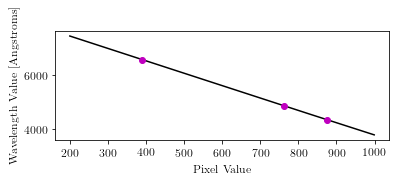

In [143]:
fig = plt.figure(figsize=(6, 2))
plt.plot(np.arange(200, 1000), sol_h, 'k')
plt.plot(peaks2, h_vals, 'o', color='m')
plt.xlabel('Pixel Value')
plt.ylabel('Wavelength Value [Angstroms]')

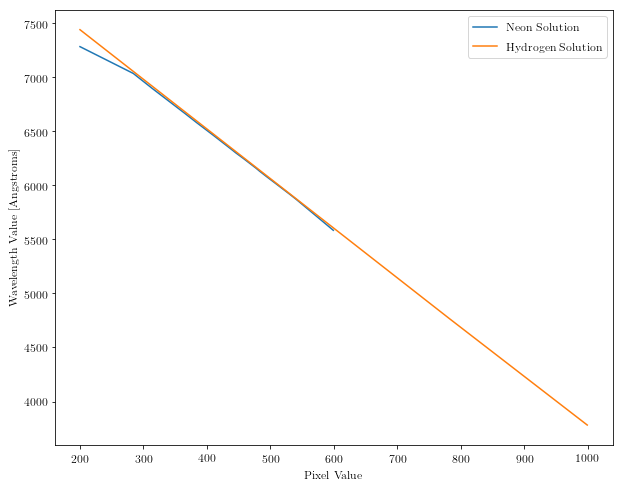

In [144]:
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(200, 600), sol, label='Neon Solution')
plt.plot(np.arange(200, 1000), sol_h, label='Hydrogen Solution')
plt.legend(loc='best', fancybox='True')
plt.xlabel('Pixel Value')
plt.ylabel('Wavelength Value [Angstroms]')
plt.show()

In [176]:
master_cal = interp1d(np.concatenate((peaks[1:], peaks2)), np.concatenate((neon_vals, h_vals)), fill_value='extrapolate')

In [178]:
master_sol = master_cal(np.arange(1288))

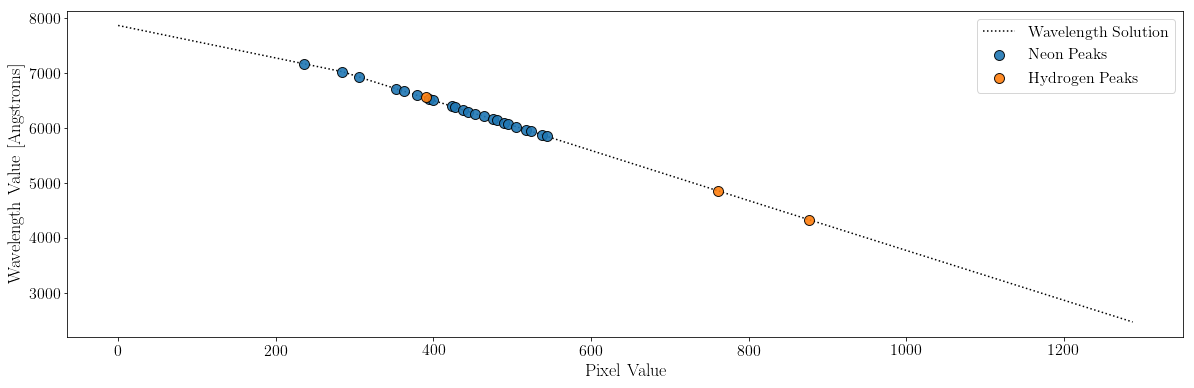

In [201]:
fig = plt.figure(figsize=(20, 6))
plt.plot(np.arange(1288), master_sol, color='k', label='Wavelength Solution', linestyle=':')
plt.plot(peaks[1:], neon_vals, 'o', label='Neon Peaks', markersize=10, alpha=0.9, mec='k')
plt.plot(peaks2, h_vals, 'o', label='Hydrogen Peaks', markersize=10, alpha=0.9, mec='k')
plt.legend(loc='best', fancybox='True', fontsize=16)
plt.xlabel('Pixel Value', fontsize=18)
plt.ylabel('Wavelength Value [Angstroms]', fontsize=18)
plt.show()

In [222]:
sun = l4.read_tiff('./data/April17/Sun1-1.tiff')[500:550]

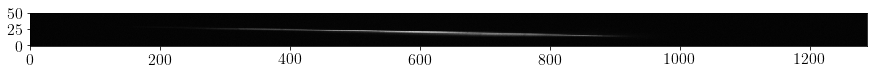

In [223]:
fig = plt.figure( figsize=(15,15) )
plt.imshow(sun, vmin=0, vmax=255, origin='lower')
plt.show()

In [226]:
sun_peaks = np.asarray([np.argmax(sun[:,i,2]) for i in range(400, 800)])

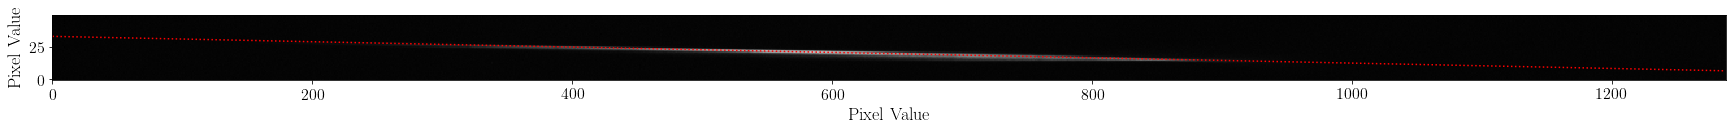

In [330]:
fig = plt.figure( figsize=(30,30) )
plt.imshow(sun, vmin=0, vmax=255, origin='lower')
plt.plot(np.arange(1288), line[1] + np.arange(1288)*line[0], color='red', linestyle=':')
plt.xlabel('Pixel Value', fontsize=18)
plt.ylabel('Pixel Value', fontsize=18)
plt.show()

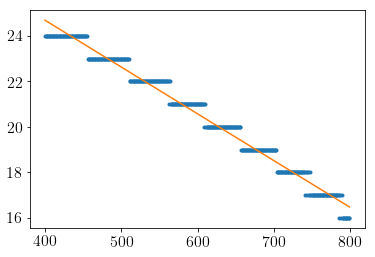

In [237]:
plt.plot(np.arange(400, 800), sun_peaks, '.')
plt.plot(np.arange(400, 800), line[1] + np.arange(400, 800)*line[0])

In [234]:
line = np.polyfit(np.arange(400, 800), sun_peaks, 1)

In [260]:
subtracted_sun = np.zeros(np.shape(sun)[:2])

In [261]:
for i in range(np.shape(sun)[1]):
    subtracted_sun[:,i] = sun[:,i,2] - (line[1] + i*line[0])

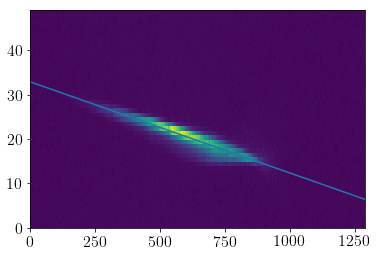

In [279]:
plt.pcolormesh(np.arange(1288), np.arange(50), sun[:,:,2])
plt.plot(np.arange(1288), line[1] + line[0]*np.arange(1288))

In [283]:
yint = line[1]
yint2 = line[1] + 1288*line[0]
rot_angle = np.rad2deg(np.arctan((yint-yint2)/1288))

In [308]:
rotated_sun = rotate(sun, -rot_angle)

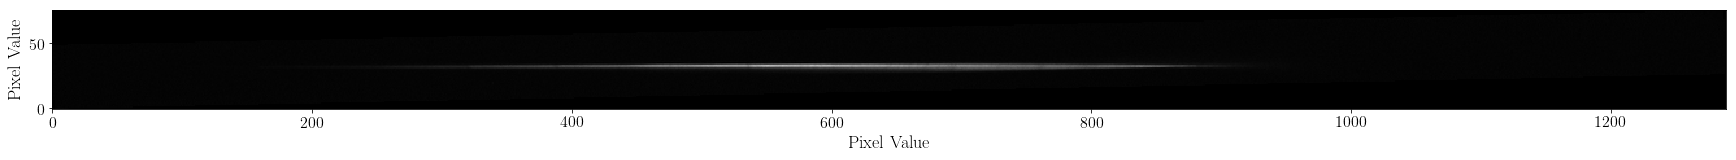

In [332]:
fig = plt.figure( figsize=(30,30) )
plt.imshow(rotated_sun, vmin=0, vmax=255, origin='lower')#, aspect='auto')
plt.xlabel('Pixel Value', fontsize=18)
plt.ylabel('Pixel Value', fontsize=18)
plt.show()

In [315]:
summed_sun = np.zeros((1288, 3))
for i in range(np.shape(rotated_sun)[1])[:-1]:
    temp = np.sum(rotated_sun[30:34,i])
    summed_sun[i] = temp

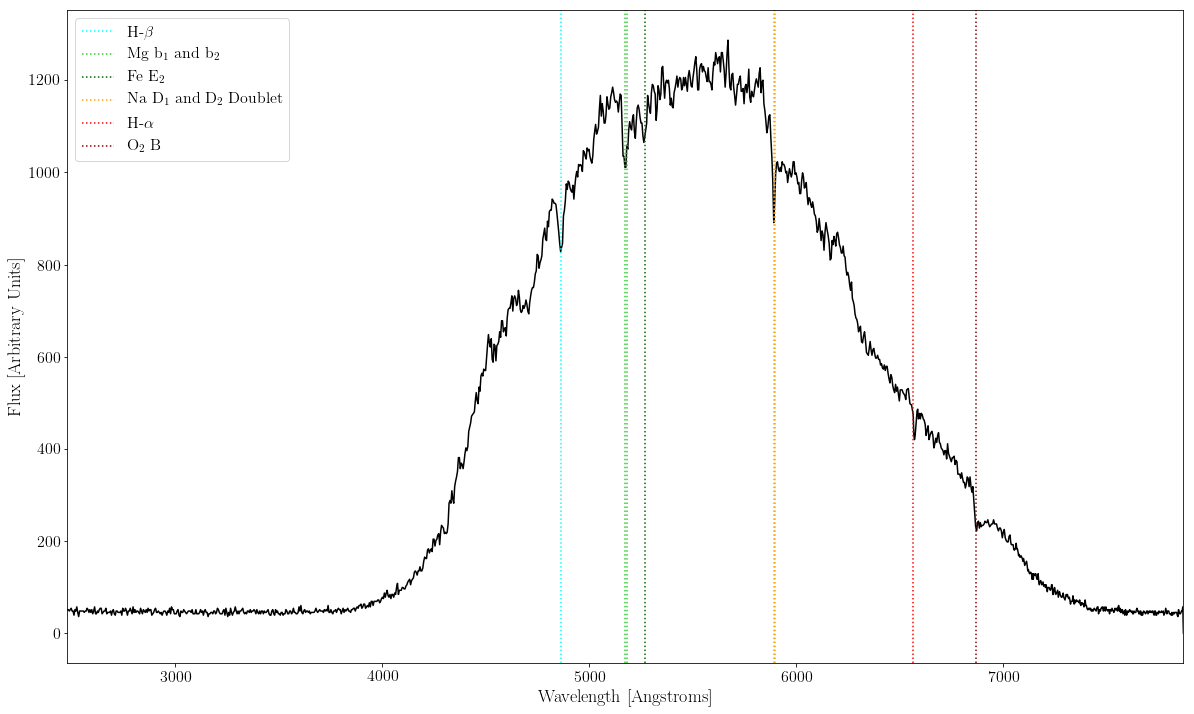

In [355]:
fig = plt.figure(figsize=(20, 12))
plt.plot(master_sol, summed_sun[:,2], color='k')
plt.xlabel('Wavelength [Angstroms]', fontsize=18)
plt.ylabel('Flux [Arbitrary Units]', fontsize=18)
plt.xlim(min(master_sol), max(master_sol))
plt.axvline(4861.3615, color='aqua', linestyle=':', label=r'H-$\beta$')
plt.axvline(5183.62, color='limegreen', linestyle=':', label=r'Mg b${}_1$ and b${}_2$')
plt.axvline(5172.70, color='limegreen', linestyle=':')
plt.axvline(5270.39, color='darkgreen', linestyle=':', label='Fe E${}_2$')
plt.axvline(5895.92, color='orange', linestyle=':')
plt.axvline(5889.95, color='orange', linestyle=':', label=r'Na D${}_1$ and D${}_2$ Doublet')
plt.axvline(6564.5377, color='red', linestyle=':', label=r'H-$\alpha$')
plt.axvline(6867.19, color='maroon', linestyle=':', label=r'O${}_2$ B')
plt.legend(loc='best', fancybox='True', fontsize=16)
plt.show()